In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# add ones to the start of X

# y = t0 + t1*x1 = [t0, t1] * [1, x1].transpose = t.transpose * x

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

In [5]:
# the closed form solution of the linear model parameters 
# that minimize the cost function (MSE -> Mean Squared Error) is 

# t = (X.transpose * X).inverse * X.transpose * y

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.25772432],
       [2.88995228]])

In [8]:
t0_pred, t1_pred = 4.5, 2.5  # the actual values were 4 and 3 respectively

In [9]:
# the equivalent code using Scikit-Learn would be

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.25772432]), array([[2.88995228]]))

## Gradient Descent

In [11]:
# slope of the cost function MSE = 2/m * X.transpose * (X * t - y)

In [12]:
eta = 0.1  # learning rate
n_iteration = 1000
m = 100  # number of instances

theta = np.random.randn(2, 1)  # random initialization

for _ in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.25772432],
       [2.88995228]])

In [14]:
# That is exactly what the closed form equation found as well

## Stochastic Gradient Descent

The main problem with batch gradient descent is that it uses the entire training set to compute the gradients at each step, which makes it very slow when the training set is large.

At the opposite extreme Stochastic Gradient Descent just picks a random instance in the training set at each step and computes the gradients based only on the single instance.

This makes the algorithm much faster, but on the other hand due to it's random nature this algorithm is much less
regular than Batch Gradient Descent: instead of gently decreasing the cost function bounces up and down, decreasing 
only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to
bounce around, never settling down.

This meaning if the cost function is irregular it can actually help the algorithm jump out of local minima. So 
Stochastic Gradient Descent has a higher chance of finding the global mimimum than Batch Gradient Descent.

Though randomness is good to jump out of local optima, but bad because it means that the algorithm can never settle
at the mimima. Once solution to this is to gradually reduce the learning rate - this is called Simulated Annealing.

In [15]:
n_epochs = 100
m = 100  # number of instances
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients    

In [16]:
theta

array([[4.25314782],
       [2.86588781]])

In [17]:
# Stochastic Gradient Descent with Scikit Learn

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

C:\Users\rahul\appPackages\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.28427177]), array([2.92071237]))

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [21]:
X_poly[0]

array([8.41039671e-04, 7.07347728e-07])

In [22]:
X[0][0], X[0][0]**2

(0.000841039670700372, 7.073477276917901e-07)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
lin_reg.intercept_, lin_reg.coef_

(array([2.42433209]), array([[1.00722588, 0.52674129]]))

If a model performs well on the training data but generalizes poorly according to cross-validation metrics, then the model is OVERFITTING. If the model performs poorly on both, then it is UNDERFITTING. This is one way to tell when a model is too simple or too complex.

The BIAS / VARIANCE TradeOff.

A models generalization errors can be attributed to 3 factors.

Bias => This is part of the generalization error that is caused due to wrong assumptions about the data, such as assuming that the data is linear when it is actually quadratic. A high bias model is most likely to UNDERFIT the training data.

Variance => This part is due to the models sensitivity to small variations in the training data. A model with many degrees of freedom, such as a high-degree polynomial model, is likely to have high variance, and thus is likely to OVERFIT the training data.

Irreducible Error => This part is due to the noisiness of the data itself. The only way to reduce this is to clean up the data itself.

Increasing a model's COMPLEXITY will typically increase it's VARIANCE and reduce it's BIAS. Conversely, reducing a models COMPLEXITY will increase its BIAS and reduce it's VARIANCE. That is why it is called a tradeoff.

## Regularized Linear Models

Regularizing a model (i.e. constraining it) is a good way to reduce OVERFITTING. The fewer degrees of freedom it has, the harder it will be for a model to overfit the data.

A simple way to Regularize a Polynomial model is to reduce the number of polynomial degrees.

For a linear model Regularization is typically achieved by constraining the weights of the model's coefficeints.

<ul>
<li>RIDGE REGRESSION</li>
<li>LASSO REGRESSION</li>
<li>ELASTIC NET</li>
</ul>

These are 3 different ways to constrain the weights.

RIDGE REGRESSION adds half of the L2-norm of the weight vectors to the cost function.
LASSO REGRESSION adds the L1-norm of the weight vectors to the cost function.

In [25]:
m = 100

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

In [26]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Similar to LinearRegression RidgeRegression can also be solved either using a closed form equation
# or using Gradient Descent. The pros and cons are the same.

# The Ridge class construction takes an argument solver
# If solver = "cholesky" then it is solved using closed form equation
# If solver = "sag" (Stochastic Average Gradient Descent it is a variant of SGD), then it is solved using gradient descent

ridge_reg = Ridge(alpha=1, solver="cholesky")  

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ridge_reg)
])

In [27]:
pipeline.fit(X, y.ravel())

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001))])

In [28]:
y_pred = pipeline.predict(X)

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y.ravel(), y_pred)

0.6771799203175926

In [30]:
ridge_reg = Ridge(alpha=1, solver="sag")  

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ridge_reg)
])

In [31]:
pipeline.fit(X, y.ravel())
y_pred = pipeline.predict(X)

mean_squared_error(y.ravel(), y_pred)

0.6768960231140183

In [32]:
ridge_reg = SGDRegressor(penalty="l2")

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ridge_reg)
])

pipeline.fit(X, y.ravel())
y_pred = pipeline.predict(X)

mean_squared_error(y.ravel(), y_pred)

C:\Users\rahul\appPackages\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


3.5916342331217557

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the norm of the l2-norm of the weight vector: this is simply ridge regression.

LASSO Regression adds the L1-norms of the weight vectors to the cost function.

<b>
An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features.

In other words Lasso Regression automatically performs feature selection and outputs a sparse model.
</b>

In [33]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', lasso_reg)
])

pipeline.fit(X, y.ravel())
y_pred = pipeline.predict(X)

mean_squared_error(y.ravel(), y_pred)

0.6868737427576502

ELASTIC NET is a middle ground between Ridge and Lasso Reg. The regularization term is simple mix of Ridge and Lasso's regularization terms. You can control the mix using the ratio r. If r = 0 , Elastic net is equivalant to Ridge and if r=1 the Elastic Net is equivalent to Lasso

In [34]:
# l1_ratio is correspond to the mix ratio r

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', elastic_net)
])

pipeline.fit(X, y.ravel())
y_pred = pipeline.predict(X)

mean_squared_error(y.ravel(), y_pred)

0.6942385935096275

## Logistic / Logit Regression

Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class. (e.g. What is the probability that an email is a SPAM ?) If the probability is > 50% then the model predicts that the instance belongs to that class, else the model predicts that it does not. This makes it a BINARY CLASSIFIER.

Cost Function:

-log(p)    if y = 1 <br>
-log(1-p)  if y = 0

The cost function over the whole training set is the average cost over all the training instances. This can be represented as:

$$J\left( \theta  \right) =  - {1 \over m}\sum\limits_{i = 1}^m {\left[ {{y^{(i)}}\log \left( {{{\mathop p\limits^ \wedge  }^{\left( i \right)}}} \right) + \left( {1 - {y^{\left( i \right)}}} \right)\log \left( {1 - {{\mathop p\limits^ \wedge  }^{\left( i \right)}}} \right)} \right]} $$

Where:

$$\mathop p\limits^ \wedge  \left( i \right) = {h_\theta }\left( x \right) = \sigma \left( {{\theta ^T}x} \right)$$

Where:

$$\sigma \left( t \right) = {1 \over {1 + \exp \left( { - t} \right)}}$$

Is the Sigmoid function

The bad news is that there is no known closed form equation to compute the value of theta that minimizes the cost function.

But the good news is that this cost function is convex, so Gradient Descent or any other optimization algorithm is guranteed to find the global minimum (if the learning rate is not too large and we wait long enough)

In [35]:
from sklearn import datasets

In [36]:
iris = datasets.load_iris()

In [39]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [41]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [42]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let us try to build a classifier to detect the iris virginica type based only on the "petal width" feature.

In [44]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

C:\Users\rahul\appPackages\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let us look at the model's estimated probabilities for for flowers with petal widths varying from 0 to 3 cm

In [49]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [50]:
%matplotlib inline

In [51]:
import matplotlib.pyplot as plt

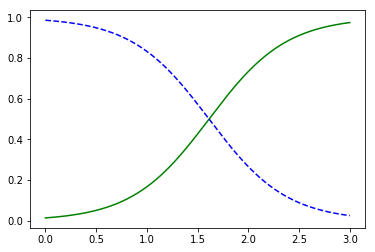

In [53]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

Just like other Linear Models, Logistic Regression models can be regularized using l1 and l2 penalties. Scikit-Learn actually adds an l2 penalty by default.

The Hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse C. The higher the value of C, the less the model is regularized.

Scikit-Learn's LogisticRegression used the one-vs-all by default when trained on more than 2 classes. , but we can set the <b>multi_class</b> hyperparameter to "<b>multinomial</b>" to switch it to Softmax Regression instead. You must also specify a SOLVER that supports Softmax Regression, such as "<b>lbfgs</b>" It also applies the l2 regularization by default, which can be controlled using the hyperparameter C. 

In [54]:
X = iris['data'][:, (2, 3)]  # petal length and petal width
y = iris['target']

In [55]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
softmax_reg.predict([[5, 2]])

array([2])

In [57]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])